In [ ]:
#Using UCI-Secom data from Kaggle

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('secnclass.csv')
print(data.shape)
print(data.head(5))

(3068, 68)
              timestamp  signal_0  signal_1   signal_2   signal_3  signal_4  \
0  2019-01-01T00:00:04Z   3016.64   2492.80  2246.4889  1006.9548    1.0997   
1  2019-01-01T00:01:01Z   2980.84   2628.76  2187.5222  1268.6598    1.4503   
2  2019-01-01T00:02:06Z   2847.81   2461.38  2202.7111  1010.4454    1.0032   
3  2019-01-01T00:03:01Z      0.00   2544.52  2202.7111  1010.4454    1.0032   
4  2019-01-01T00:04:04Z   2975.64   2508.28  2202.7111  1010.4454    1.0032   

   signal_6  signal_7  signal_8  signal_9  ...  signal_62  signal_63  \
0  103.3222    0.1184    1.5068    0.0126  ...   110.4482    19.6637   
1  102.4622    0.1233    1.4672   -0.0088  ...    99.1745    30.5082   
2  104.3067    0.1225    1.4970   -0.0077  ...   107.1900    23.5618   
3  104.3067    0.1225    1.4727   -0.0044  ...   111.2245    22.6964   
4  104.3067    0.1225    1.5079   -0.0086  ...   106.9691    19.4236   

   signal_64  signal_65  signal_66  signal_67  signal_68  signal_70  \
0    23.54

In [ ]:
data.columns

Index(['timestamp', 'signal_0', 'signal_1', 'signal_2', 'signal_3', 'signal_4',
       'signal_6', 'signal_7', 'signal_8', 'signal_9', 'signal_10',
       'signal_11', 'signal_12', 'signal_14', 'signal_15', 'signal_16',
       'signal_17', 'signal_18', 'signal_19', 'signal_20', 'signal_21',
       'signal_22', 'signal_23', 'signal_24', 'signal_25', 'signal_26',
       'signal_27', 'signal_28', 'signal_29', 'signal_30', 'signal_31',
       'signal_32', 'signal_33', 'signal_34', 'signal_35', 'signal_36',
       'signal_37', 'signal_38', 'signal_39', 'signal_40', 'signal_41',
       'signal_43', 'signal_44', 'signal_45', 'signal_46', 'signal_47',
       'signal_48', 'signal_50', 'signal_51', 'signal_53', 'signal_54',
       'signal_55', 'signal_56', 'signal_57', 'signal_58', 'signal_59',
       'signal_60', 'signal_61', 'signal_62', 'signal_63', 'signal_64',
       'signal_65', 'signal_66', 'signal_67', 'signal_68', 'signal_70',
       'signal_71', 'Pass/Fail'],
      dtype='object')

In [ ]:
d = data.isnull().sum()
j = []
for i in d.keys():
    if(d[i] >900):
        j.append(i)

In [ ]:
j

[]

In [ ]:
data.drop(j, axis = 1, inplace = True)

In [ ]:
data.replace(np.nan, 0, inplace = True)
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = np.nan, strategy = 'mean')
data.isnull().any().any()

False

In [ ]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score


In [ ]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(data.shape)

(2147, 66)
(921, 66)
(3068, 68)


In [ ]:
(data['Pass/Fail'] == 1).index

RangeIndex(start=0, stop=3068, step=1)

In [ ]:
data.head(2)

,timestamp,signal_0,signal_1,signal_2,signal_3,signal_4,signal_6,signal_7,signal_8,signal_9,...,signal_62,signal_63,signal_64,signal_65,signal_66,signal_67,signal_68,signal_70,signal_71,Pass/Fail
0,2019-01-01T00:00:04Z,3016.64,2492.80,2246.4889,1006.9548,1.0997,103.3222,0.1184,1.5068,0.0126,...,110.4482,19.6637,23.5418,32.3378,693.5756,1.0104,147.87,608.3618,108.2171,-1
1,2019-01-01T00:01:01Z,2980.84,2628.76,2187.5222,1268.6598,1.4503,102.4622,0.1233,1.4672,-0.0088,...,99.1745,30.5082,30.9500,39.6830,685.4901,1.0204,144.72,597.3318,103.4133,-1


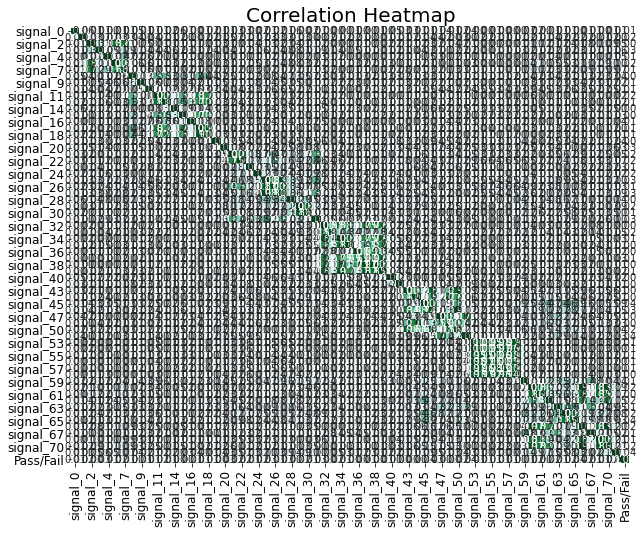

In [ ]:
corr = data.corr()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
    
# plot the heatmap
plt.figure(figsize = (10, 8))

sns.heatmap(corr.abs(), cmap='BuGn', cbar=False, vmin=0, vmax=1, annot=True, fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [ ]:
#61,62,66,70 accepted by mset2
a1=data.iloc[:,57]
a2=data.iloc[:,58]
a3=data.iloc[:,62]
a4=data.iloc[:,65]

In [ ]:
data_slice=data.iloc[:,52:56]

In [ ]:
datasubset = pd.concat([data_slice,a1,a2,a3,a4,], axis=1, join='inner')
datasubset.head()

,signal_56,signal_57,signal_58,signal_59,signal_61,signal_62,signal_66,signal_70
0,0.9342,0.9362,4.6082,16.4582,10.5974,110.4482,693.5756,608.3618
1,0.9318,0.9443,4.6463,9.0500,10.9359,99.1745,685.4901,597.3318
2,0.9323,0.9476,4.6206,18.8309,10.7287,107.1900,698.6469,608.1364
3,0.9269,0.9412,4.6686,18.2809,10.5395,111.2245,702.5207,613.5800
4,0.9326,0.9509,4.6879,19.8000,10.7269,106.9691,695.6754,613.0100


## Signals 61,62,66,70 were accepted by mset2

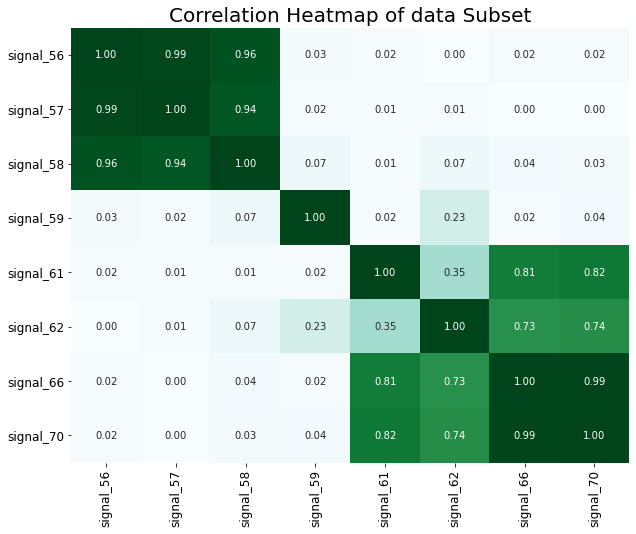

In [ ]:
# plot the heatmap
corrsubset = datasubset.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corrsubset.abs(), cmap='BuGn', cbar=False, vmin=0, vmax=1, annot=True, fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap of data Subset', fontsize=20)
plt.show()

In [ ]:
data_slicenew=data.iloc[:,56:67]

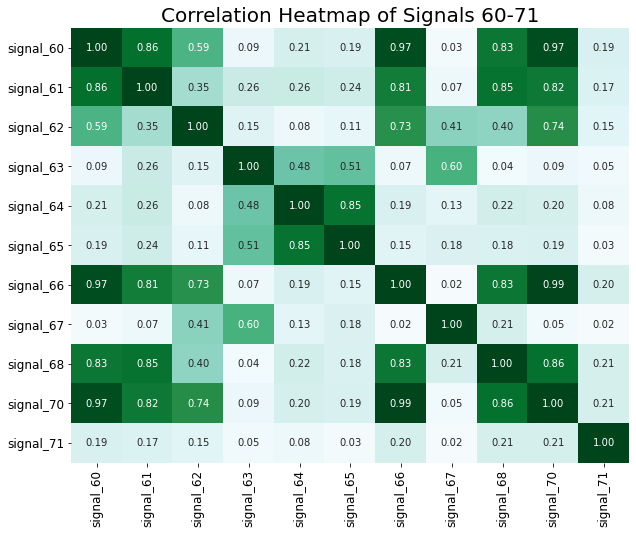

In [ ]:
# plot the heatmap
corrsubsetnew = data_slicenew.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corrsubsetnew.abs(), cmap='BuGn', cbar=False, vmin=0, vmax=1, annot=True, fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap of Signals 60-71', fontsize=20)
plt.show()

In [ ]:
data_initial=data.iloc[:,1:11]

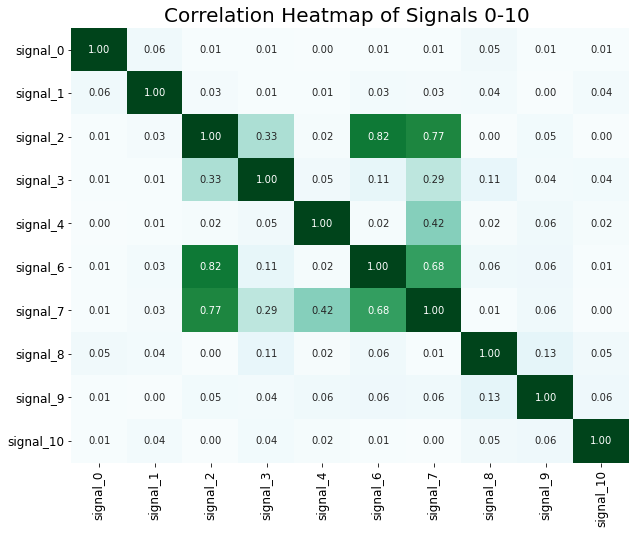

In [ ]:
# plot the heatmap
corrsubsetinitial = data_initial.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corrsubsetinitial.abs(), cmap='BuGn', cbar=False, vmin=0, vmax=1, annot=True, fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Heatmap of Signals 0-10 ', fontsize=20)
plt.show()

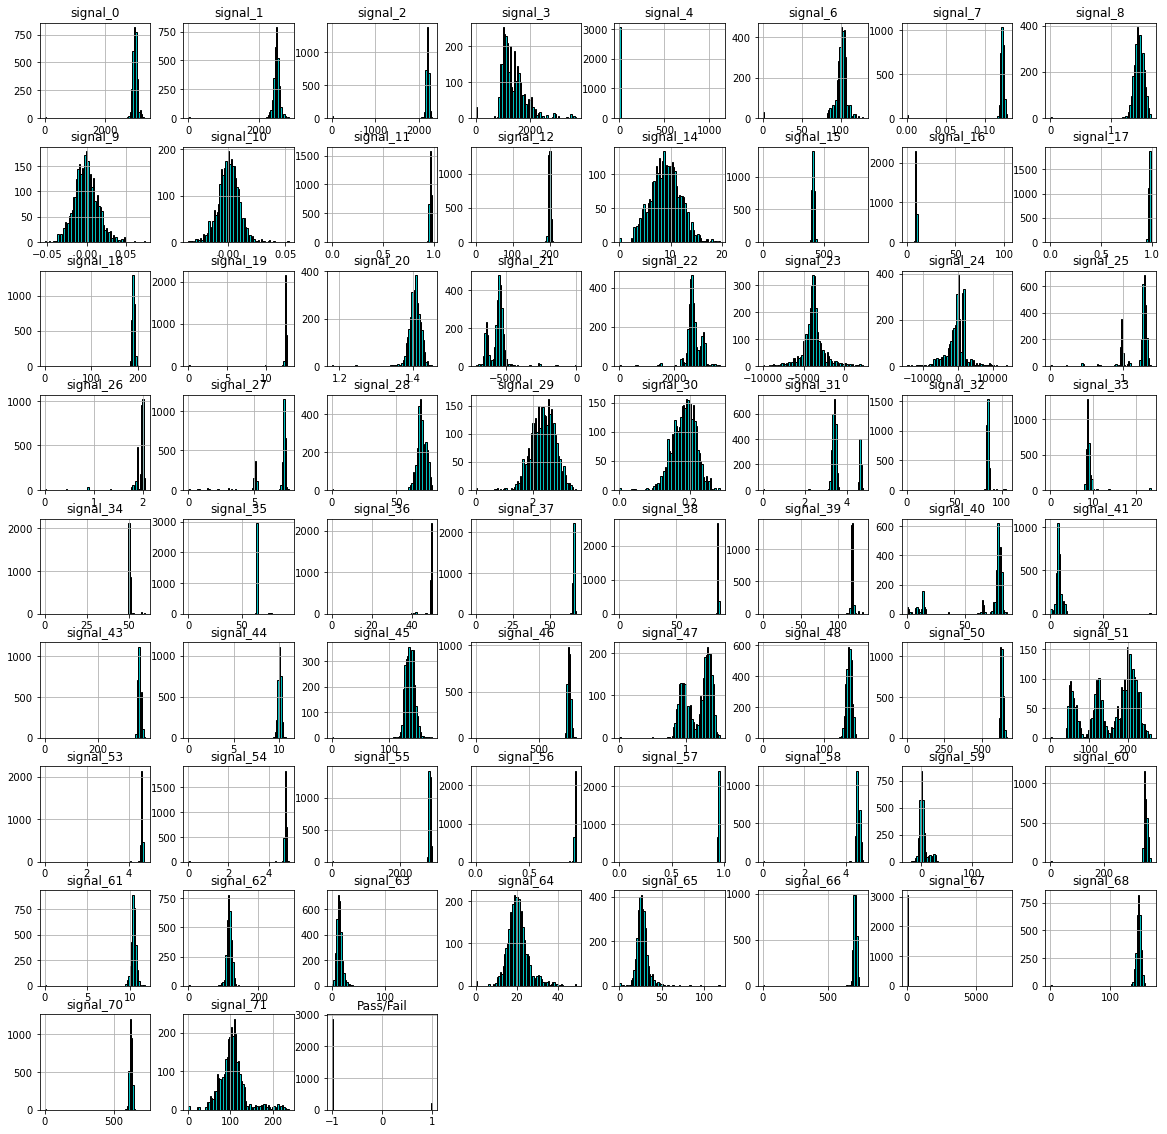

In [ ]:
data_hist = data.drop('timestamp', 1)
data_hist.hist(figsize=(20,20), bins = 71, color = "c", edgecolor='black')
plt.show()

In [ ]:
datan=data

In [ ]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
x_train_std

array([[ 0.43249352, -0.2430933 ,  0.32315263, ...,  0.3663719 ,
         0.0063169 ,  0.61997767],
       [ 0.55727777, -0.15328452, -0.09942167, ..., -0.14689313,
         0.08657538, -1.68913813],
       [-0.01449864, -1.1467507 ,  0.08136142, ..., -0.23950461,
        -0.01244021, -0.40236576],
       ...,
       [ 0.34551808,  0.02494067,  0.07037824, ..., -0.14076476,
         0.10917431,  0.06112271],
       [ 0.47903522, -0.13912861,  0.06876477, ...,  0.30105135,
         0.09231023,  1.31949927],
       [ 0.01301246, -0.44133401,  0.09333405, ...,  0.16918457,
        -0.20446359,  0.28610395]])

In [ ]:
y_test[y_test == -1].sum()

-862

In [ ]:
x_test_std

array([[ 3.71767197e-01, -5.81962746e-02, -6.44417023e-02, ...,
         5.57430862e-01, -2.77596074e-01,  1.00931483e-01],
       [-3.47912228e-02,  1.09760079e-01, -5.89763456e-02, ...,
        -9.14236737e-04,  6.18331100e-01, -2.46863841e-01],
       [ 8.94882445e-02, -4.46785439e-02,  2.90306142e-01, ...,
        -7.64562348e-02,  1.80760085e-01,  1.34824981e-01],
       ...,
       [-2.75828776e-01, -3.19730374e-02,  9.70299339e-02, ...,
         2.45851043e-01, -6.44412214e-02,  3.44706273e+00],
       [ 3.80954388e-01,  5.09548414e-01,  3.46173028e-02, ...,
         1.82475827e-01, -1.04409040e-01,  1.37220603e-01],
       [-2.85116925e-01, -3.05866628e-01,  2.48715368e-01, ...,
        -2.57192545e-01,  5.31081627e-01, -1.06202836e+00]])

In [ ]:
min(x_test_std[1])

-1.2972897701445587

In [ ]:
isolation = IsolationForest()
isolation.fit(x_train_std, y_train)
y_pred_iso = isolation.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_iso, y_test))
cmiso = confusion_matrix(y_pred_iso, y_test)
print('precision_score', average_precision_score(y_pred_iso, y_test))
print('recall_score', recall_score(y_pred_iso, y_test))
print('f1_score',f1_score(y_pred_iso,y_test))

accuracy score 0.07600434310532031
precision_score 0.9857038774286372
recall_score 0.06387665198237885
f1_score 0.11995863495346432


In [ ]:
cmiso

array([[ 12,   1],
       [850,  58]])

In [ ]:
tn, fp, fn, tp = cmiso.ravel()

In [ ]:
fpr=fp/(tn+fp)
fpr

0.07692307692307693

In [ ]:
data.head(2)

,timestamp,signal_0,signal_1,signal_2,signal_3,signal_4,signal_6,signal_7,signal_8,signal_9,...,signal_62,signal_63,signal_64,signal_65,signal_66,signal_67,signal_68,signal_70,signal_71,Pass/Fail
0,2019-01-01T00:00:04Z,3016.64,2492.80,2246.4889,1006.9548,1.0997,103.3222,0.1184,1.5068,0.0126,...,110.4482,19.6637,23.5418,32.3378,693.5756,1.0104,147.87,608.3618,108.2171,-1
1,2019-01-01T00:01:01Z,2980.84,2628.76,2187.5222,1268.6598,1.4503,102.4622,0.1233,1.4672,-0.0088,...,99.1745,30.5082,30.9500,39.6830,685.4901,1.0204,144.72,597.3318,103.4133,-1


In [ ]:
datag.drop('timestamp',axis=1,inplace=True)

KeyError: "['timestamp'] not found in axis"

In [ ]:
datac.drop('Pass/Fail',axis=1,inplace=True)

In [ ]:
datac.head(1)

,signal_0,signal_1,signal_2,signal_3,signal_4,signal_6,signal_7,signal_8,signal_9,signal_10,...,signal_61,signal_62,signal_63,signal_64,signal_65,signal_66,signal_67,signal_68,signal_70,signal_71
0,3016.64,2492.8,2246.4889,1006.9548,1.0997,103.3222,0.1184,1.5068,0.0126,-0.0023,...,10.5974,110.4482,19.6637,23.5418,32.3378,693.5756,1.0104,147.87,608.3618,108.2171


In [ ]:
xc = datac.iloc[:, 1:-1]
yc = datac.iloc[:, -1]
xc_train, xc_test, yc_train, yc_test = train_test_split(xc, yc, train_size = 0.7, random_state = 0)

In [ ]:
# mahalanobis distance elliptic envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope
elenv = EllipticEnvelope()
print(elenv)

EllipticEnvelope()


In [ ]:
elenv.fit(datac)
scores = elenv.score_samples(datac)

/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-177.502610407240780 > -192.787644010393535). You may want to try with a higher value of support_fraction (current value: 0.513).
  RuntimeWarning)
/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-173.171261629293809 > -184.011285039466742). You may want to try with a higher value of support_fraction (current value: 0.513).
  RuntimeWarning)
/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:171: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-171.495321565189386 > -183.188312012820688). You may want to try with a higher value of suppor

In [ ]:
from numpy import quantile, where, random
thresh = quantile(scores, .02)
print(thresh)

-37312.108590170224


In [ ]:
index = where(scores <= thresh)
values = datac[index] 

TypeError: '(array([  24,  107,  121,  206,  288,  610,  784,  786,  793,  838,  863,
        975,  989, 1062, 1070, 1090, 1137, 1281, 1346, 1368, 1459, 1462,
       1464, 1490, 1492, 1493, 1494, 1495, 1500, 1521, 1530, 1558, 1641,
       1655, 1740, 1822, 2144, 2318, 2320, 2327, 2372, 2397, 2509, 2523,
       2596, 2604, 2624, 2671, 2815, 2880, 2902, 2993, 2996, 2998, 3024,
       3026, 3027, 3028, 3029, 3034, 3055, 3064]),)' is an invalid key

In [ ]:
from sklearn.datasets import make_blobs
random.seed(2)
x, _ = make_blobs(n_samples=200, centers=1, cluster_std=.3, center_box=(20, 5)) 

,signal_0,signal_1,signal_2,signal_3,signal_4,signal_6,signal_7,signal_8,signal_9,signal_10,...,signal_62,signal_63,signal_64,signal_65,signal_66,signal_67,signal_68,signal_70,signal_71,Pass/Fail
0,3016.64,2492.80,2246.4889,1006.9548,1.0997,103.3222,0.1184,1.5068,0.0126,-0.0023,...,110.4482,19.6637,23.5418,32.3378,693.5756,1.0104,147.8700,608.3618,108.2171,-1
1,2980.84,2628.76,2187.5222,1268.6598,1.4503,102.4622,0.1233,1.4672,-0.0088,0.0071,...,99.1745,30.5082,30.9500,39.6830,685.4901,1.0204,144.7200,597.3318,103.4133,-1
2,2847.81,2461.38,2202.7111,1010.4454,1.0032,104.3067,0.1225,1.4970,-0.0077,0.0068,...,107.1900,23.5618,21.1691,29.5773,698.6469,1.0443,143.2891,608.1364,96.5525,1
3,0.00,2544.52,2202.7111,1010.4454,1.0032,104.3067,0.1225,1.4727,-0.0044,0.0136,...,111.2245,22.6964,21.7191,29.8969,702.5207,1.0279,143.7109,613.5800,119.3303,-1
4,2975.64,2508.28,2202.7111,1010.4454,1.0032,104.3067,0.1225,1.5079,-0.0086,0.0070,...,106.9691,19.4236,20.2000,28.6955,695.6754,0.8520,150.9355,613.0100,73.9395,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,124.8273,12.8672,18.7482,24.1495,717.4752,0.9489,141.7700,622.0773,137.5953,-1
3064,2898.17,2547.65,0.0000,0.0000,0.0000,0.0000,0.0000,1.4425,0.0222,0.0037,...,128.7200,9.8903,19.9936,23.1671,715.2258,1.3807,147.3509,622.5364,189.3247,-1
3065,3045.87,2493.72,2168.5111,1171.6442,0.8752,101.6567,0.1235,1.5442,-0.0135,0.0031,...,118.5727,12.0600,17.8073,25.1118,719.1343,0.9662,147.2818,629.8845,115.7673,-1
3066,2926.38,2383.76,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3561,0.0021,-0.0012,...,126.2809,9.8418,16.3336,21.3671,719.0953,0.9487,142.0909,623.7782,130.0714,-1


In [ ]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [ ]:
from sklearn.covariance import EllipticEnvelope
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit()
# Create column that shows anomaly status
datac['Anomaly or Not'] = el.predict(datac)

NameError: name 'covariance' is not defined

NameError: name 'covariance' is not defined

In [ ]:
from sklearn import ensemble
model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=.01, max_features=5, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(x_train_std,y_train)

In [ ]:
anomaly_score = model.decision_function(d)
predictions = model.predict(d)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(d['Var 1'], d['Var 2'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Var 1', fontsize = 16)
plt.ylabel('Var 2', fontsize = 16)
plt.grid()
# To Plot Predictions
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(d['Var 1'], d['Var 2'], c = predictions, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('Var 1', fontsize = 16)
plt.ylabel('Var 2', fontsize = 16)
plt.grid()
plt.title('Contamination = 0.01', weight = 'bold')

In [ ]:
cmiso

array([[  0,   0],
       [445,  26]])

In [ ]:
print(cmiso[1][1]/ (cmiso[1][1] + cmiso[0][1]))

1.0


In [ ]:
forest = RandomForestClassifier()
forest.fit(x_train_std, y_train)
y_pred_rf = forest.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_rf, y_test))
print('confusion_matrix', confusion_matrix(y_pred_rf, y_test))
print('precision_score', average_precision_score(y_pred_rf, y_test))

accuracy score 0.9447983014861996
confusion_matrix [[445  26]
 [  0   0]]
precision_score nan


/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [ ]:
y_test[y_test == 1].sum()

26

In [ ]:
xgb1 = xgb.XGBClassifier(objective = 'binary:logistic', booster = 'gblinear')
xgb1.fit(x_train_std, y_train)
y_pred_xgb = xgb1.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_xgb, y_test))
print('confusion_matrix', confusion_matrix(y_pred_xgb, y_test))
print('precision_score', average_precision_score(y_pred_xgb, y_test))


accuracy score 0.8768577494692145
confusion_matrix [[405  18]
 [ 40   8]]
precision_score 0.13620774130328273


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[5, 10, 250, 100, 500],
    'penalty':['l1', 'l2']
}
gslr = GridSearchCV(estimator = lr, param_grid = param_grid, n_jobs = -1, cv = 10)
gslr.fit(x_train_std, y_train)
y_pred_gslr = gslr.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_gslr, y_test))
print('confusion_matrix', confusion_matrix(y_pred_gslr, y_test))
print('precision_score', average_precision_score(y_pred_gslr, y_test))

accuracy score 0.8598726114649682
confusion_matrix [[401  22]
 [ 44   4]]
precision_score 0.10623877184386739


/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('confusion_matrix', confusion_matrix(y_pred_gslr, y_test))

confusion_matrix [[401  22]
 [ 44   4]]


In [ ]:
parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(forest, parameters, cv = 5)
random_grid.fit(x_train_std, y_train)
y_pred_gslr = random_grid.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_gslr, y_test))
print('confusion_matrix', confusion_matrix(y_pred_gslr, y_test))
print('precision_score', average_precision_score(y_pred_gslr, y_test))


accuracy score 0.9447983014861996
confusion_matrix [[445  26]
 [  0   0]]
precision_score nan


/home/datascience/conda/mlcpuv1/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_std, y_train)
y_pred_lda = lda.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_lda, y_test))
print('confusion_matrix', confusion_matrix(y_pred_lda, y_test))
print('precision_score', average_precision_score(y_pred_lda, y_test))
print('recall_score', recall_score(y_pred_lda, y_test))
print('f1_score',f1_score(y_pred_lda,y_test))

accuracy score 0.8832271762208068
confusion_matrix [[411  21]
 [ 34   5]]
precision_score 0.09684166886518675
recall_score 0.1282051282051282
f1_score 0.15384615384615385
